In [4]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib
%matplotlib inline

Mean context lengths: 137.905358756
Max context lengths: 766
Min context lengths: 22
Median context lengths: 127.0


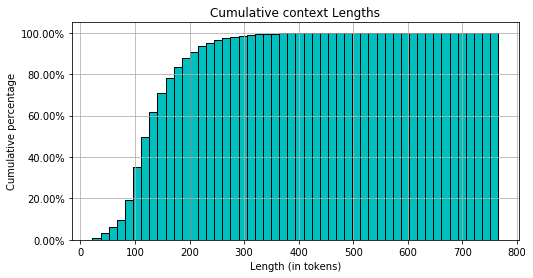

In [5]:
context = open("train.context", "r")
context_lens = [len(example.split()) for example in context]


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = '%3.2f'%(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
plt.figure(figsize=(8,4))
h=plt.hist(context_lens, bins=50, cumulative=True, normed=True,facecolor='c',edgecolor='k')
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
#plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.grid(which='both')
plt.title("Cumulative context Lengths")
plt.xlabel("Length (in tokens)")
plt.ylabel("Cumulative percentage")
filename = "context_lengths_cumulative.png"
plt.savefig(filename,dpi=300, bbox_inches='tight')
print('Mean context lengths:', np.mean(context_lens))
print('Max context lengths:', np.max(context_lens))
print('Min context lengths:', np.min(context_lens))
print('Median context lengths:', np.median(context_lens))

Mean answer lengths: 3.38285105299
Max answer lengths: 46
Min answer lengths: 1
Median answer lengths: 2.0


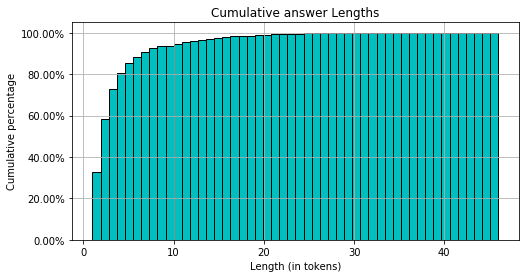

In [6]:
answer = open("train.answer", "r")
answer_lens = [len(example.split()) for example in answer]


def to_percent(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = '%3.2f'%(100 * y)

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'
plt.figure(figsize=(8,4))
h = plt.hist(answer_lens, bins=50, cumulative=True, normed=True,facecolor='c',edgecolor='k')
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
#plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.grid(which='both')
plt.title("Cumulative answer Lengths")
plt.xlabel("Length (in tokens)")
plt.ylabel("Cumulative percentage")
filename = "answer_lengths_cumulative.png"
plt.savefig(filename,dpi=300, bbox_inches='tight')
print('Mean answer lengths:', np.mean(answer_lens))
print('Max answer lengths:', np.max(answer_lens))
print('Min answer lengths:', np.min(answer_lens))
print('Median answer lengths:', np.median(answer_lens))

In [17]:
d = {i : (h[1][i],h[0][i]) for i in range(len(h[0]))}


In [18]:
d

{0: (1.0, 2.3167991103491425e-05),
 1: (2.1799999999999997, 0.00010425595996571138),
 2: (3.3599999999999999, 0.0043903343141116222),
 3: (4.54, 0.018719736811621066),
 4: (5.7199999999999998, 0.05808215369645299),
 5: (6.8999999999999995, 0.23067210342191219),
 6: (8.0800000000000001, 0.35094872923568787),
 7: (9.2599999999999998, 0.47382017005305466),
 8: (10.44, 0.58750550239788701),
 9: (11.619999999999999, 0.68483423302365454),
 10: (12.799999999999999, 0.76528508213052848),
 11: (13.979999999999999, 0.87544887982763009),
 12: (15.16, 0.91184579385121511),
 13: (16.34, 0.93781711187822903),
 14: (17.52, 0.95613140884553904),
 15: (18.699999999999999, 0.96958042768111585),
 16: (19.879999999999999, 0.98526515765817957),
 17: (21.059999999999999, 0.98989875587887788),
 18: (22.239999999999998, 0.99279475476681434),
 19: (23.419999999999998, 0.994903041957232),
 20: (24.599999999999998, 0.99636262539675191),
 21: (25.779999999999998, 0.99742835298751253),
 22: (26.959999999999997, 0.

Mean question lengths: 11.2902370085
Max question lengths: 60
Min question lengths: 1
Median question lengths: 11.0


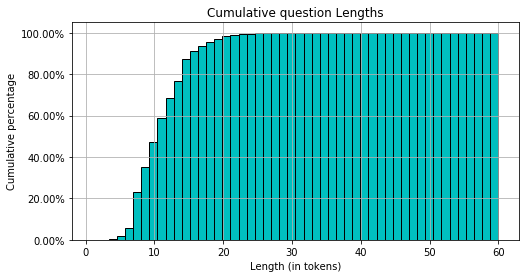

In [26]:
question = open("train.question", "r")
question_lens = [len(example.split()) for example in question]
plt.figure(figsize=(8,4))
h = plt.hist(question_lens, bins=50, cumulative=True, normed=True,facecolor='c',edgecolor='k')
formatter = FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(formatter)
#plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.grid(which='both')
plt.title("Cumulative question Lengths")
plt.xlabel("Length (in tokens)")
plt.ylabel("Cumulative percentage")
filename = "question_lengths_cumulative.png"
plt.savefig(filename,dpi=300, bbox_inches='tight')
print('Mean question lengths:', np.mean(question_lens))
print('Max question lengths:', np.max(question_lens))
print('Min question lengths:', np.min(question_lens))
print('Median question lengths:', np.median(question_lens))

In [27]:
d = {i : (h[1][i],h[0][i]) for i in range(len(h[0]))}


In [28]:
d[20]

(24.599999999999998, 0.99636262539675191)

Text(0,0.5,'Frequency')

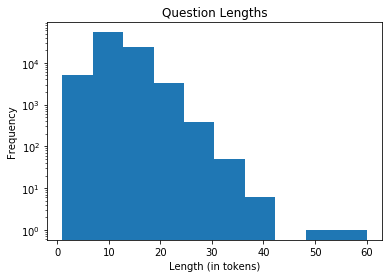

In [29]:

plt.hist(question_lens)
plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.title("Question Lengths")
plt.xlabel("Length (in tokens)")
plt.ylabel("Frequency")

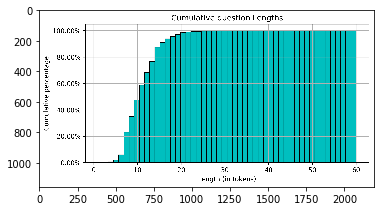

In [30]:
plt.imshow(plt.imread(filename))

Text(0,0.5,'Frequency')

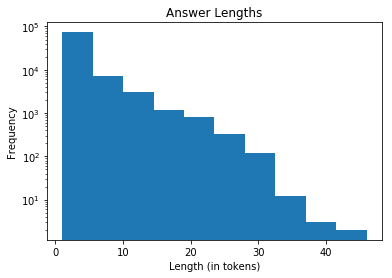

In [31]:
answer = open("train.answer", "r")
answer_lens = [len(example.split()) for example in answer]

plt.hist(answer_lens)
plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.title("Answer Lengths")
plt.xlabel("Length (in tokens)")
plt.ylabel("Frequency")

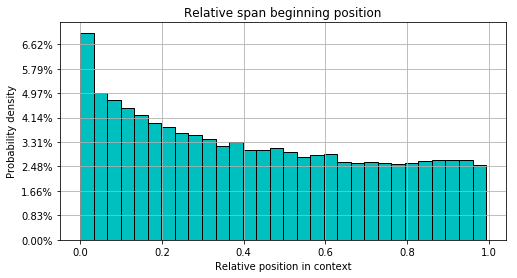

In [59]:
span = open("train.span", "r")
span_ends = [list(map(int, example.split())) for example in span]

#where the answer is in the context as a ratio
#ex. for a context i of length n with an answer span [j, k],
#beginnings[i] = j/n
#ends[i] = k/n
def to_pdf(y, position):
    # Ignore the passed in position. This has the effect of scaling the default
    # tick locations.
    s = '%3.2f'%(100 * y/h[0].sum())

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

plt.figure(figsize=(8,4))
beginnings = [float(span_ends[_][0])/float(context_lens[_]) for _ in range(len(span_ends))]
#plt.hist(beginnings)
h = plt.hist(beginnings, bins=30, cumulative=False,density=True,facecolor='c',edgecolor='k')
# plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.title("Relative span beginning position")
plt.xlabel("Relative position in context")
plt.ylabel("Probability density")
formatter = FuncFormatter(to_pdf)
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(which='both')
filename = "start_pos_dist.png"
plt.savefig(filename,dpi=300, bbox_inches='tight')


In [56]:
h[0].sum()

30.20979020979021

Text(0,0.5,'Frequency')

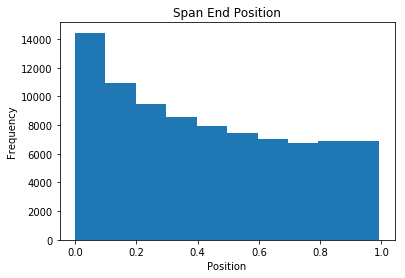

In [51]:


ends = [float(span_ends[_][1])/float(context_lens[_]) for _ in range(len(span_ends))]

plt.hist(beginnings)
# plt.yscale('log', nonposy='clip') #comment out to remove log scale
plt.title("Span End Position")
plt.xlabel("Position")
plt.ylabel("Frequency")
